# Chinese Language Processing

## Question 1

The csv file `songs.csv` includes 100 posts from Dcard, a on-line discussion forum for students in Taiwan.

Please preprocess the data by:
- removing symbols, punctuations, emoticons or other non-linguistic symbols
- performing word segmentation on the corpus using `ckip-transformer`
- creating a word frequency list of this tiny corpus

```{warning}
Please note that the preprocessing steps are important. Removal of characters from texts may have a lot to do with the word segmentation performance.
```

In [13]:
import pandas as pd
import re

df = pd.read_excel('../../python-notes/corpus/dcard.xlsx')
[re.split(r'\n+', art) for art in list(df['content'])]

[['部分回應在B117 ',
  '謝謝各位的留言，我都有看完',
  '好的不好的，我都接受謝謝大家🙇\u200d♀️',
  '（第三次更新在這邊）',
  'B258 這邊也有講到怎麼逃生',
  '很多人好奇我是怎麼踹門的，',
  '在這邊跟大家說一下，',
  '因為這台車本來就很老舊，',
  '加上我文章說的我有停在路邊檢查，',
  '之前有在練空手道，所以比較知道怎麼施力😥',
  '謝謝大家的關心，其他比較有問題的我會在留言一一回覆！',
  '後續處理的部分',
  '租車公司的話，他有很多間公司我當時租車的地方在新莊中原路。 ',
  '我是在平台上訂的，租車公司沒有跟平台講，',
  '是我家人主動跟平台聯繫，所有的馬3都被下架。',
  '另外，前幾天有開事故會議，',
  '平台的律師態度是覺得不需要賠很多錢，',
  '因為他在談話中談到想用5000元跟我和解，',
  '但是我燒壞的東西跟經歷了那場浩劫的我',
  '實在是沒辦法接受',
  '難不成一條人命只值5000嗎⋯⋯',
  '對這個平台的律師感到非常不解',
  '如果和解談不成的話，可能會上訴',
  '目前車子在等待第三方鑑定，',
  '鑑定完後會再談一次。',
  '以下正文',
  '2/19號這天，我跟我的朋友們要去台中吃燒烤，因為大家都住在北部，所以想說租一台車一起下去比高鐵便宜，加上大家都會開車，可以輪流開。',
  '租車的人是我本人，因為非常臨時租車，所以我上網查到一個平台是提供租車服務，非常方便也很便宜。',
  '這是我租車當時的資料。',
  'https://i.imgur.com/vjtbzMD.jpg',
  'https://i.imgur.com/sXtHoFy.jpg',
  'https://i.imgur.com/WgZ9pnD.jpg',
  '沒想到我當天取車的時候，老闆跟我說他派錯人手了，請我搭計程車到新莊的總站去牽車',
  'https://i.imgur.com/95y2NVW.jpg',
  '這是我當時去全家按的計程車證明聯。',
  '而到了現場，老闆態度還不錯，',
  '但因為我在台中的燒肉店有預約下午一點，',
  '我跟他說我已經有點被耽誤了，',
  '我還要去桃園接我朋友才能一起下去，',
  

In [111]:
import nltk
import spacy
import unicodedata
import re
import collections
from bs4 import BeautifulSoup
import ckip_transformers
from nltk.tokenize import WhitespaceTokenizer
from ckip_transformers.nlp import CkipWordSegmenter#, CkipPosTagger, CkipNerChunker


#nlp = spacy.load('zh-core-web-sm', parse=True, tag=True, entity=True)


# Initialize drivers
ws_driver  = CkipWordSegmenter(level=3, device = -1)
tokenizer = WhitespaceTokenizer()

with open('../../../RepositoryData/data/stopwords/tomlinNTUB-chinese-stopwords.txt') as f:
    stopword_list = f.read().splitlines()


def word_seg(text):
    # texts is a full article
    # CKIPtagger works on a list, so we split the texts into paragraphs first
    text_lines = re.split(r'\n+', text)
    text_lines_seg = ws_driver(text_lines, use_delim = True) # sents-splits for word-seg
    text_lines = [' '.join(line_tokens) for line_tokens in text_lines_seg]
    text_seg = '\n'.join(text_lines)
    return text_seg
    
    

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    if bool(soup.find()):
        [s.extract() for s in soup(['iframe', 'script'])]
        stripped_text = soup.get_text()
        stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    else:
        stripped_text = text
    return stripped_text



# def lemmatize_text(text):
#     text = nlp(text)
#     text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
#     return text


# def remove_repeated_characters(tokens):
#     repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
#     match_substitution = r'\1\2\3'
#     def replace(old_word):
#         if wordnet.synsets(old_word):
#             return old_word
#         new_word = repeat_pattern.sub(match_substitution, old_word)
#         return replace(new_word) if new_word != old_word else new_word
            
#     correct_tokens = [replace(word) for word in tokens]
#     return correct_tokens




def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('utf-8', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_digits(text):
    pattern = r'[0-9]+'
    text = re.sub(pattern, '', text)
    return text

def remove_alphabets(text):
    pattern = r'[a-zA-Z_-]+'
    text = re.sub(pattern, '', text)
    return text


def remove_symbols(text):
    """
    
    Unicode 6.0 has 7 character categories, and each category has subcategories:

    Letter (L): lowercase (Ll), modifier (Lm), titlecase (Lt), uppercase (Lu), other (Lo)
    Mark (M): spacing combining (Mc), enclosing (Me), non-spacing (Mn)
    Number (N): decimal digit (Nd), letter (Nl), other (No)
    Punctuation (P): connector (Pc), dash (Pd), initial quote (Pi), final quote (Pf), open (Ps), close (Pe), other (Po)
    Symbol (S): currency (Sc), modifier (Sk), math (Sm), other (So)
    Separator (Z): line (Zl), paragraph (Zp), space (Zs)
    Other (C): control (Cc), format (Cf), not assigned (Cn), private use (Co), surrogate (Cs)
    
    
    There are 3 ranges reserved for private use (Co subcategory): 
    U+E000—U+F8FF (6,400 code points), U+F0000—U+FFFFD (65,534) and U+100000—U+10FFFD (65,534). 
    Surrogates (Cs subcategory) use the range U+D800—U+DFFF (2,048 code points).
    
    
    """

    ## Brute-force version: list all possible unicode ranges, but this list is not complete.
    #   text = re.sub('[\u0021-\u002f\u003a-\u0040\u005b-\u0060\u007b-\u007e\u00a1-\u00bf\u2000-\u206f\u2013-\u204a\u20a0-\u20bf\u2100-\u214f\u2150-\u218b\u2190-\u21ff\u2200-\u22ff\u2300-\u23ff\u2460-\u24ff\u2500-\u257f\u2580-\u259f\u25a0-\u25ff\u2600-\u26ff\u2e00-\u2e7f\u3000-\u303f\ufe50-\ufe6f\ufe30-\ufe4f\ufe10-\ufe1f\uff00-\uffef─◆╱]+','',text)

    text = ''.join(ch for ch in text
                   if unicodedata.category(ch)[0] not in ['P', 'S'])
    return text



def remove_stopwords(text, stopwords=stopword_list):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


def normalize_corpus(corpus, 
                     html_stripping=False,
                     accented_char_removal=True,
                     symbols_removal=True,
                     stopword_removal=True, 
                     digits_removal=True,
                     alphabets_removal=True,
                     stopwords=stopword_list):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        
        # word segmentation
        doc = word_seg(doc)

        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)

        # remove extra newlines
        doc = doc.translate(doc.maketrans("\n\t\r", "   "))

        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)


        # remove special characters and\or digits    
        if symbols_removal:
            doc = remove_symbols(doc)  

        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)

        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, stopwords=stopwords)
        
        # remove digits
        if digits_removal:
            doc = remove_digits(doc)
        if alphabets_removal:
            doc = remove_alphabets(doc)

        # remove extra whitespace
        doc = re.sub('[ ]+', ' ', doc)
        doc = doc.strip()
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [113]:
%%time
dcard_arts_normalized = normalize_corpus(dcard_arts)

Inference: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


Inference: 100%|██████████| 1/1 [00:06<00:00,  6.83s/it]

CPU times: user 15min 5s, sys: 16.1 s, total: 15min 21s
Wall time: 15min 6s


In [115]:
import pickle


with open('dcard_normed.pickle', 'wb') as f:
    pickle.dump(dcard_arts_normalized, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('dcard_normled.pickle', 'rb') as f:
    dcard_arts_normalized = pickle.load(f)

In [139]:
dcards_words = sum([re.sub(r' +',' ', a).split(' ') for a in dcard_arts_normalized], [])

In [144]:
dcards_wf = nltk.FreqDist([w for w in dcards_words if len(w)>=2])

In [145]:
dcards_wf.most_common(20)

[('真的', 115),
 ('沒有', 92),
 ('覺得', 90),
 ('知道', 70),
 ('看到', 67),
 ('現在', 63),
 ('喜歡', 56),
 ('朋友', 54),
 ('其實', 52),
 ('一直', 52),
 ('不會', 51),
 ('發現', 43),
 ('男友', 42),
 ('一下', 41),
 ('已經', 41),
 ('很多', 40),
 ('時間', 40),
 ('工作', 40),
 ('分享', 39),
 ('感覺', 39)]

## Question 2

In this exercise, please try the `spacy` for Chinese processing.

Please process the same Dcard corpus by:

- performing the word tokenization
- identifying all nouns and verbs (i.e., words whose tags start with N or V)
- identifying all words with at least two characters
- removing all words that contain alphabets or digits
- removing all words that are included in the `stopword_list`

Based on the above text-preprocessing criteria, your goal is to create a word frequency list and visualize the result in a Word Cloud.

```{note}
`spacy` uses the `jieba` for Chinese word segmentation. There may be more tagging errors. In the expected results presented below, I did not use any self-defined dictionary. For this exercise, please ignore any tagging errors out of the module for the moment.
```

In [149]:
import spacy
nlp = spacy.load('zh_core_web_trf')## disable=["parser"]


In [161]:
doc = nlp(dcard_arts[1])

In [162]:
print(' | '.join([token.text+"_"+token.tag_ for token in doc]))

https://i.imgur_URL | ._URL | com_NR | /_PU | REI_PU | EzSd.jpg_NN | 
__SP | 身高_NN | 195_CD | 公分_M | 的_DEC | 男大_NN | 生楊_NR | 承翰_NR | 在_P | 家教_NN | 社團_NN | P_PU | O_PU | 文徵_VV | 學生_NN | 的_DEC | 文章_NN | 被_LB | 網友_NN | 推爆_VV | 了_AS | ，_PU | 網友_NN | 們_NN | 看到_VV | 他_PN | 的_DEG | 學經歷_NN | 及_CC | 成績_NN | 不禁_AD | 大讚_VV | 根本_AD | 就是_VC | 學霸王_NN | ，_PU | 而_AD | 他_PN | 不只_AD | 擁_VV | 有_VV | 高_JJ | 顏質_NN | ，_PU | 還_CC | 是_CC | 籃球_NN | 系隊_NN | 成員_NN | ，_PU | 超乎_VV | 常人_NN | 的_DEC | 學經歷_NN | 及_CC | 證書_NN | 考試_NN | 成績_NN | ，_PU | 瞬間_AD | 讓_VV | 網友_NN | 都_AD | 跪著_VV | 朝聖_VV | ，_PU | 直呼_VV | 「_PU | 天哪_NN | 好_AD | 厲害_VA | 的_DEC | 帥哥_NN | 」_PU | 、_PU | 「_PU | 這個_PN | 當_VV | 家教_NN | 太_AD | 可惜_VA | 了_AS | 」_PU | 。_PU | 
__SP | 21_CD | 歲_M | 台大_NR | 學生_NN | 楊_NR | 承翰_NR | 日前_NT | 在_P | 臉書_NN | 社團_NN | 「_PU | 家教_NN | 補教_NN | 學校_NN | 兼_CC | 全_JJ | 職_JJ | 、_PU | 打工_NN | 、_PU | 師訓_NN | 交流_NN | 」_PU | 發文_VV | ，_PU | 想_VV | 以_P | 時薪_NN | 1千5百_CD | 元_M | 找_VV | 家教_NN | 學生_NN | ，_PU | 授課_NN | 內容_NN | 為_VC | 英文_NN 

In [166]:
dcard_arts[:2]

['部分回應在B117 \n謝謝各位的留言，我都有看完\n好的不好的，我都接受謝謝大家🙇\u200d♀️\n（第三次更新在這邊）\nB258 這邊也有講到怎麼逃生\n很多人好奇我是怎麼踹門的，\n在這邊跟大家說一下，\n因為這台車本來就很老舊，\n加上我文章說的我有停在路邊檢查，\n之前有在練空手道，所以比較知道怎麼施力😥\n謝謝大家的關心，其他比較有問題的我會在留言一一回覆！\n後續處理的部分\n租車公司的話，他有很多間公司我當時租車的地方在新莊中原路。 \n我是在平台上訂的，租車公司沒有跟平台講，\n是我家人主動跟平台聯繫，所有的馬3都被下架。\n另外，前幾天有開事故會議，\n平台的律師態度是覺得不需要賠很多錢，\n因為他在談話中談到想用5000元跟我和解，\n但是我燒壞的東西跟經歷了那場浩劫的我\n實在是沒辦法接受\n難不成一條人命只值5000嗎⋯⋯\n對這個平台的律師感到非常不解\n如果和解談不成的話，可能會上訴\n目前車子在等待第三方鑑定，\n鑑定完後會再談一次。\n以下正文\n2/19號這天，我跟我的朋友們要去台中吃燒烤，因為大家都住在北部，所以想說租一台車一起下去比高鐵便宜，加上大家都會開車，可以輪流開。\n租車的人是我本人，因為非常臨時租車，所以我上網查到一個平台是提供租車服務，非常方便也很便宜。\n這是我租車當時的資料。\nhttps://i.imgur.com/vjtbzMD.jpg\nhttps://i.imgur.com/sXtHoFy.jpg\nhttps://i.imgur.com/WgZ9pnD.jpg\n沒想到我當天取車的時候，老闆跟我說他派錯人手了，請我搭計程車到新莊的總站去牽車\nhttps://i.imgur.com/95y2NVW.jpg\n這是我當時去全家按的計程車證明聯。\n而到了現場，老闆態度還不錯，\n但因為我在台中的燒肉店有預約下午一點，\n我跟他說我已經有點被耽誤了，\n我還要去桃園接我朋友才能一起下去，\n所以老闆二話不說叫我簽名蓋指紋章後，\n立馬把車開到門口讓我出發，\n是已經發動引擎的狀態。（這邊我知道我不應該沒檢查就開出去，真的很後悔）\n開出去的時候都還好，\n但是開了10分鐘後我要上快速道路前，\n我發現我的車子被限速在60，\n儀表板上面顯示我的車門沒有關好，\n所以我停在路邊檢查我的車子，\n我把

In [196]:
with open('../../../RepositoryData/data/stopwords/tomlinNTUB-chinese-stopwords.txt') as f:
    stopword_list = f.read().splitlines()

In [201]:
%%time
doc_list = nlp.pipe(dcard_arts[:3])
## extract all nouns
nouns_verbs = []
for d in doc_list:
    nouns_verbs.append([token.text for token in d 
                        if token.tag_[0] in ['N','V'] and len(token.text)>=2 
                        and not re.match(r'[a-z0-9\\/]+',token.text)
                       and token.text not in stopword_list])

CPU times: user 34.1 s, sys: 801 ms, total: 34.9 s
Wall time: 34.1 s


In [199]:
nouns_verbs

[['回應',
  '謝謝',
  '留言',
  '完',
  '好的',
  '好的',
  '接受',
  '謝謝',
  '更新',
  '講到',
  '逃生',
  '好奇',
  '踹門',
  '說',
  '台車',
  '老舊',
  '文章',
  '說',
  '停在',
  '路邊',
  '檢查',
  '練空',
  '手道',
  '知道',
  '施力',
  '謝謝',
  '關心',
  '問題',
  '會',
  '留言',
  '回覆',
  '處理',
  '部分',
  '租車',
  '公司',
  '公司',
  '當時',
  '租車',
  '地方',
  '新莊',
  '中原路',
  '平台',
  '訂',
  '租車',
  '公司',
  '平台',
  '講',
  '家人',
  '平台',
  '聯繫',
  '馬',
  '下架',
  '前',
  '開',
  '事故',
  '會議',
  '平台',
  '律師',
  '態度',
  '覺',
  '需要',
  '賠',
  '錢',
  '談話',
  '中談',
  '想',
  '和解',
  '燒壞',
  '東西',
  '經歷',
  '浩劫',
  '沒辦法',
  '接受',
  '難',
  '人命',
  '值',
  '平台',
  '律師',
  '感到',
  '不解',
  '解談',
  '可能',
  '會上',
  '訴',
  '目前',
  '車子',
  '等待',
  '鑑定',
  '鑑定',
  '完',
  '後會',
  '談',
  '正文',
  '號',
  '這天',
  '朋友',
  '台中',
  '吃',
  '燒烤',
  '住',
  '北部',
  '想',
  '說租',
  '車',
  '下去',
  '高鐵',
  '便宜',
  '會',
  '開車',
  '流開',
  '租車',
  '租車',
  '上網',
  '查到',
  '平台',
  '提供',
  '租車',
  '服務',
  '方便',
  '便宜',
  '租車',
  '當時',
  '資料',
  'MD.jpg',
  '.',
  '想到',
  '當天',
  '

In [203]:
words = sum(nouns_verbs,[])
from collections import Counter
wf = dict(sorted(Counter(words).items(), key=lambda x:x[1], reverse=True))

import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline
matplotlib.rcParams['figure.dpi']= 150

wc = WordCloud(width=1200, height=1000,
    background_color='white',
               font_path='/System/Library/Fonts/STHeiti Medium.ttc',
               random_state=10,
               max_font_size=None) ## stopwords not work when wc.genreate_from_frequencies
wc.generate_from_frequencies(frequencies=wf)



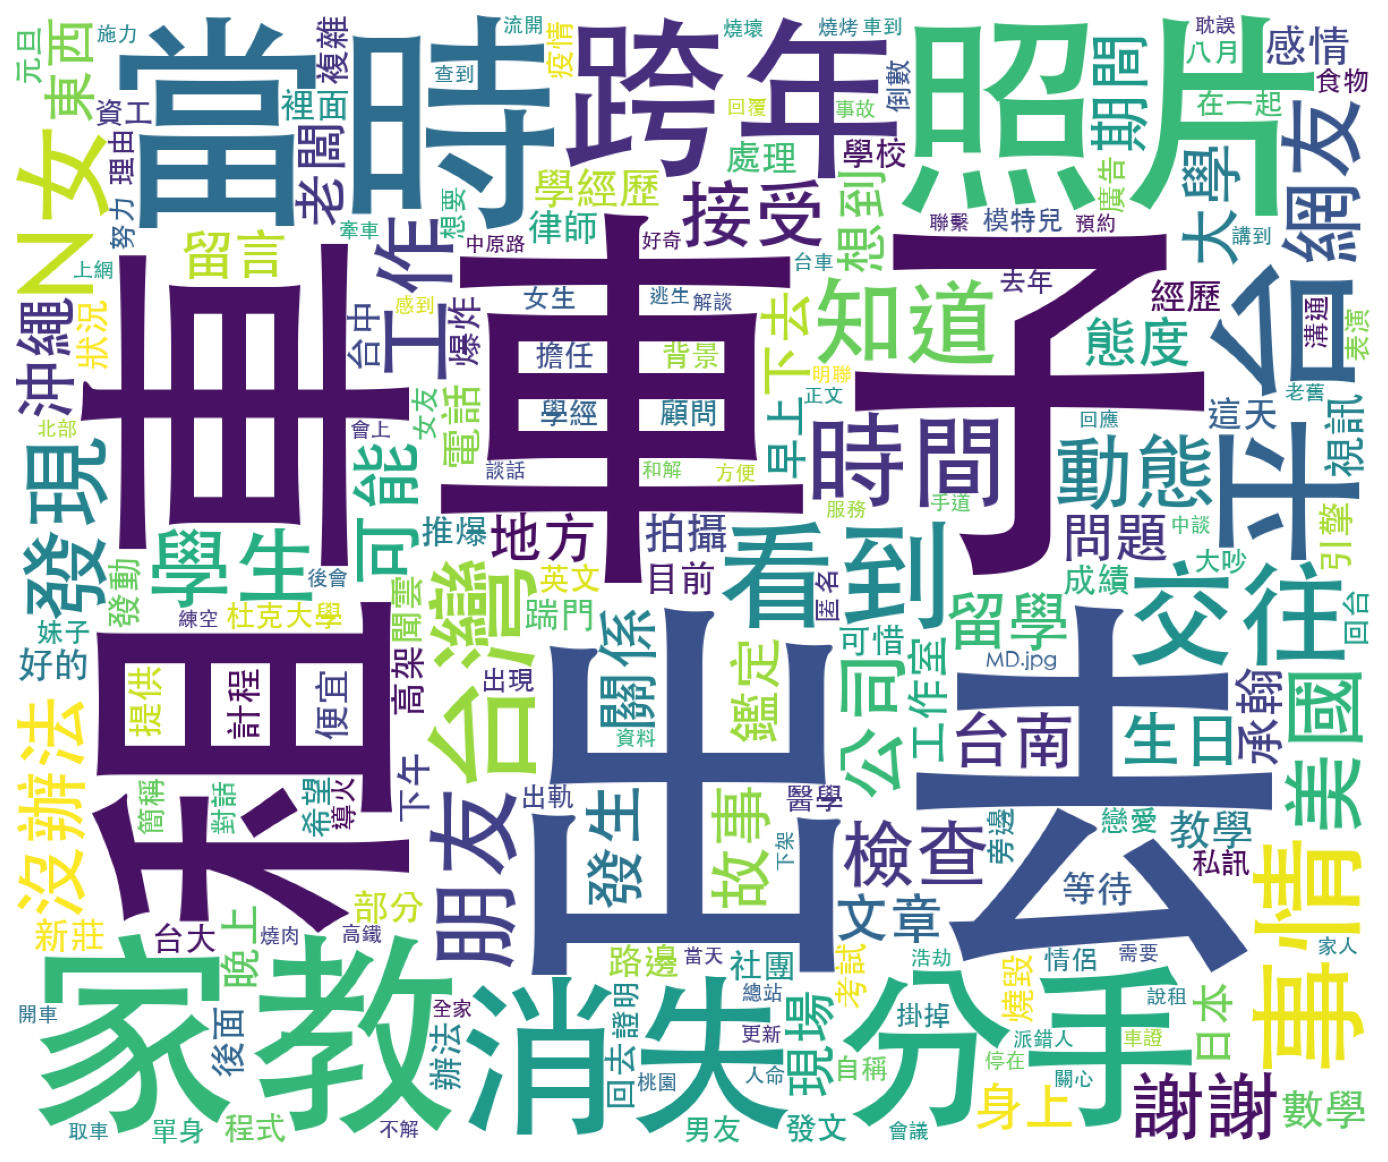

In [204]:
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()